In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt

In [2]:
df_rad = pd.read_csv('radar/test1.csv')
df_vec = xr.open_dataset('radar/video_capture_2024-07-01_12-22-37_velocimetry_results.nc')
df_vec = df_vec.to_dataframe().reset_index()

Average velocity: 1.573040380047506
        Variance: 0.004760114759000461
               n: 1684


<Axes: xlabel=' Average velocity value', ylabel='Count'>

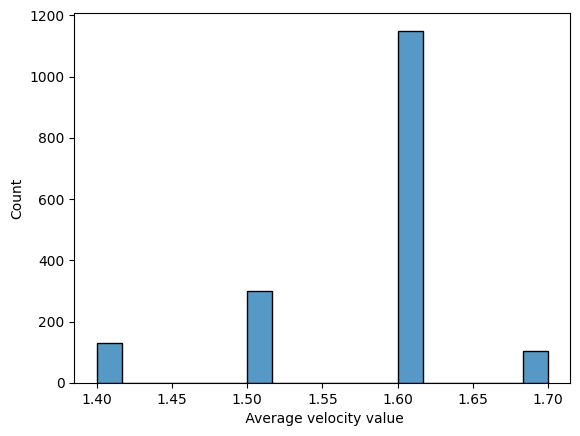

In [3]:
print(f"Average velocity: {np.mean(df_rad[' Average velocity value'])}")
print(f"        Variance: {np.var(df_rad[' Average velocity value'])}")
print(f"               n: {len(df_rad[' Average velocity value'])}")

sns.histplot(
    data=df_rad,
    x=' Average velocity value'
)

Average velocity: 0.7765180670895709
        Variance: 0.5862489069671025
               n: 1424500


<Axes: xlabel='v_len', ylabel='Count'>

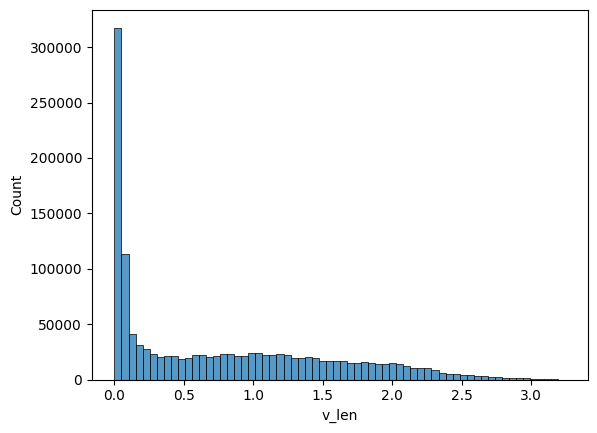

In [4]:
print(f"Average velocity: {np.mean(df_vec.v_len)}")
print(f"        Variance: {np.var(df_vec.v_len)}")
print(f"               n: {len(df_vec.v_len)}")

sns.histplot(
    data=df_vec,
    x='v_len',
    bins=64
)

Average velocity: 1.128072499158404
        Variance: 0.47761849177678223
               n: 902923


<Axes: xlabel='v_len', ylabel='Count'>

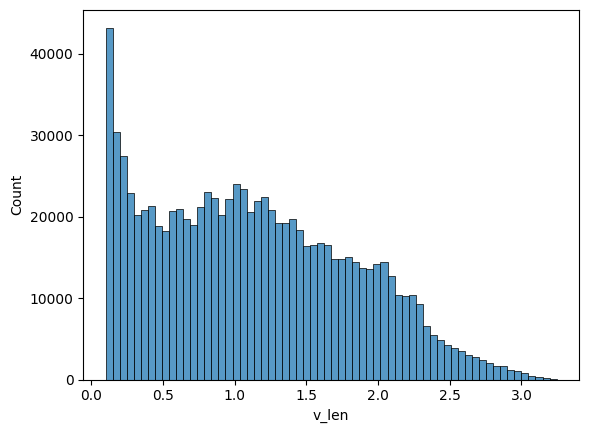

In [5]:
df_vec = df_vec[df_vec.v_len >= 0.1]

print(f"Average velocity: {np.mean(df_vec.v_len)}")
print(f"        Variance: {np.var(df_vec.v_len)}")
print(f"               n: {len(df_vec.v_len)}")

sns.histplot(
    data=df_vec,
    x='v_len',
    bins=64
)

Spacial location: 1
Average velocity: 1.231977558765692
        Variance: 0.5033317441825474
               n: 187993


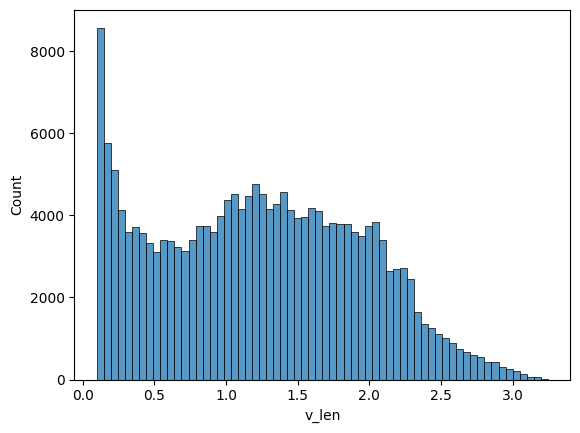

In [6]:
magnitudes = []
for i in range(5):
    magnitudes.append(np.mean(df_vec[df_vec.spacial_location == i].v_len))
index = magnitudes.index(max(magnitudes))
df_vec_sl = df_vec[df_vec.spacial_location == index]

print(f"Spacial location: {index}")
print(f"Average velocity: {np.mean(df_vec_sl.v_len)}")
print(f"        Variance: {np.var(df_vec_sl.v_len)}")
print(f"               n: {len(df_vec_sl.v_len)}")

sns.histplot(
    data=df_vec_sl,
    x='v_len',
    bins=64
)
plt.show()

In [7]:
np.random.seed(0)
n = 100

rad_samp = np.random.choice(
    np.array(df_rad[' Average velocity value']),
    n,
    replace=False
)

print('Radar')
print('--------------------------------')
print(f"    Mean: {np.mean(rad_samp)}")
print(f"Variance: {np.var(rad_samp)}")
print()

vec_samp = np.random.choice(
    np.array(df_vec_sl.v_len),
    n,
    replace=False
)

print('PyORC')
print('--------------------------------')
print(f"    Mean: {np.mean(vec_samp)}")
print(f"Variance: {np.var(vec_samp)}")
print()


Radar
--------------------------------
    Mean: 1.569
Variance: 0.004739000000000006

PyORC
--------------------------------
    Mean: 1.2065629607974502
Variance: 0.5395768216316909



In [8]:
t_stat, p_value = stats.ttest_ind(rad_samp, vec_samp, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 4.8879267857551545
p-value: 3.855636430355234e-06
